# Life cycle assessment mobility

After the energy and industrial sectors, the transport sector in Germany emits the most
greenhouse gas emissions (GHG) in Germany, thus promoting anthropogenic climate change. One approach to reducing greenhouse gas emissions can be the electrification of the powertrain. 
However, when comparing different powertrain technologies, not only the CO2 emissions during the use phase should be considered, but also **all greenhouse gas emissions (CO2-eq.) over the entire life cycle**. Many factors can play a role in this analysis. That is why many scientific life cycle assessment (LCA) studies have obtained differing results in the past few years.

This notebook offers you the possibility to analyse which factors have an influence on the results of greenhouse gas emissions for different vehicle classes and powertrains over their **whole life cycle**. 

For this, you have first the possibility to set the **parameters for the scenario setting (1.1)** and the **life cycle inventory (1.2)**. After you can see the **results for the different life cycle stages** and summed up **(2)** or to choose which type of cars with which power trains to **compare** directly **(3)**.

Here only the climate change impact measured in CO2-eq is evaluated as an example. In a comprehensive analyses, the other impact categories should to be taken into account as well. 


In [ ]:
## Importing relevant libaries/modules
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import brightway2 as bw
#from brightway2 import *
#from bw2data.parameters import ActivityParameter, DatabaseParameter, ProjectParameter, Group
import ipywidgets as widgets 
from IPython.display import display, HTML, Javascript
from ipywidgets import HBox, VBox, Label, IntSlider, Dropdown, RadioButtons, Layout, Style

import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
#toggling code 
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')



In [ ]:
def run_next(ev):
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.get_selected_index()+2)'))
    
def run_next_two(ev):
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.get_selected_index()+3)'))

def run_next_eleven(ev):
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.get_selected_index()+12)'))
     
def run_before(ev):
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()-3, IPython.notebook.get_selected_index())-1'))

def run_all_below(ev):
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.ncells())'))
    
def run_current_and_all_below(ev):
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index(), IPython.notebook.ncells())'))
    
def run_all(ev):
    display(Javascript('IPython.notebook.execute_cell_range(0, IPython.notebook.ncells())'))
    
def run_all_alternative():
    display(Javascript('IPython.notebook.execute_cell_range(0, IPython.notebook.ncells())'))


In [ ]:
#material impact climate change, could be expanded to all impact categories
cc_impact_prod=pd.read_excel('assets/excel/Input_LCA_TESA.xlsx', sheet_name = 'cc_impact_prod', index_col=[0], header=[0], engine ='openpyxl') #usecols=[0,1,2,3,4]
cc_impact_use=pd.read_excel('assets/excel/Input_LCA_TESA.xlsx', sheet_name = 'cc_impact_use', index_col=[0], header=[0],engine ='openpyxl') # usecols=[0,1,2,3], 

In [ ]:
#materials and car specifications
amount_mat_ct1=pd.read_excel('assets/excel/Input_LCA_TESA.xlsx',sheet_name = 'mat_ct1', index_col=[0], header=[0], usecols=[0,2,3,4,5,6], engine ='openpyxl')
car_specs_ct1=pd.read_excel('assets/excel/Input_LCA_TESA.xlsx',sheet_name = 'car_specs_ct1', index_col=[0], header=[0], usecols=[0,2,3,4,5,6], engine ='openpyxl')

amount_mat_ct2=pd.read_excel('assets/excel/Input_LCA_TESA.xlsx',sheet_name = 'mat_ct2', index_col=[0], header=[0], usecols=[0,2,3,4,5,6], engine ='openpyxl')
car_specs_ct2=pd.read_excel('assets/excel/Input_LCA_TESA.xlsx',sheet_name = 'car_specs_ct2', index_col=[0], header=[0], usecols=[0,2,3,4,5,6], engine ='openpyxl')

amount_mat_ct3=pd.read_excel('assets/excel/Input_LCA_TESA.xlsx',sheet_name = 'mat_ct3', index_col=[0], header=[0], usecols=[0,2,3,4,5,6], engine ='openpyxl')
car_specs_ct3=pd.read_excel('assets/excel/Input_LCA_TESA.xlsx',sheet_name = 'car_specs_ct3', index_col=[0], header=[0], usecols=[0,2,3,4,5,6], engine ='openpyxl')

amount_mat_ct4=pd.read_excel('assets/excel/Input_LCA_TESA.xlsx',sheet_name = 'mat_ct4', index_col=[0], header=[0], usecols=[0,2,3,4,5,6], engine ='openpyxl')
car_specs_ct4=pd.read_excel('assets/excel/Input_LCA_TESA.xlsx',sheet_name = 'car_specs_ct4', index_col=[0], header=[0], usecols=[0,2,3,4,5,6], engine ='openpyxl')

In [ ]:
amount_mat = [amount_mat_ct1, amount_mat_ct2,amount_mat_ct3,amount_mat_ct4]
car_specs = [car_specs_ct1, car_specs_ct2,car_specs_ct3,car_specs_ct4]

cc_mat_prod_ar = ['cc_normal','cc_ee','cc_worst']
cc_el_prod_ar = ['el_sq','el_res','el_ff']

In [ ]:
#box_layout = Layout(display='space-around',flex_flow='column',align_items='stretch', width='100%')
#box_layout = {"flex-wrap" : "initial",  "flex_flow" : "column", "align_content" : "space-between", "border" : "solid", "width" : "initial"}
box_layout = {"flex-wrap" : "initial",  "flex_flow" : "column", "align_content" : "space-between",  "width" : "initial"}

# 1. Select parameters

Choose the parameters you want to use for your LCA. 

## 1.1 Definition of goal and scope

In the first phase, you define the goal and scope of your LCA. In this case you have the possibility to set the total lifespan of the car, the mileage the car is driving per year and how high the share of urban driving is.  

In [ ]:
#lifespan

lifespan_input = IntSlider(
    value = 10,
    min=5,
    max=30,
    step = 1,
    #description='lifespan of car in years:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

lifespan_text = 'Choose how many years the car will be used?'

#mileage
mileage_year_input= IntSlider(
    value = 15,
    min=1,
    max=30,
    step = 1,
    #description='Mileage [1.000 km/a]:',
    #description = r'\([mileage 10^3 km\])',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',

)

mileage_text = 'How much mileage in thousand kilometer per year should be considered?'

#urban share
share_urban_input =  IntSlider(
                value = 50,
                    min=0,
                    max=100,
                    step = 5,
                    #description='Share of urban driving:',
                    disabled=False,
                    continuous_update=False,
                    orientation='horizontal',
                    readout=True,
                    readout_format='d'
                )


share_urban_text = 'What share is driven in urban areas? The rest is allocated to driving in the country (highway or country road).'

#Consumption 

cons_text = 'How is the driving consumption estimated?'

cons_types = {'Manufacturer data': 0.65, 'ADAC driving profiles': 1, 'Or choose own percentage:':0 }

cons_input = RadioButtons(
    options=cons_types.keys(),
    disabled=False,
)

cons_box = widgets.HBox([Label('Consumption based on:'), cons_input],layout=box_layout)


## free input


cons_free_input=widgets.BoundedIntText(
    #value=15,
    min=-60,
    max=60,
    step=5,
    #description='Percent:',
    disabled=False
)

cons_free_box_input= widgets.HBox([cons_free_input, Label('percent more (or less) than manufacturer data')])

cons_free_box = widgets.HBox([cons_free_box_input])

tab_contents = ['Lifetime', 'Mileage', 'Share of urban driving', 'Consumption']
aim_children= [
    widgets.VBox([widgets.Label(value=lifespan_text), widgets.HBox([Label('Lifespan [a]'), lifespan_input])]),
    widgets.VBox([widgets.Label(value=mileage_text), widgets.HBox([Label('Mileage [1.000 km]'), mileage_year_input])]), 
    widgets.VBox([widgets.Label(value=share_urban_text), widgets.HBox([Label('Share of urban driving [%]'), share_urban_input])]),
    widgets.VBox([widgets.VBox([widgets.Label(value= cons_text), cons_box, cons_free_box])])]
aim_acc = widgets.Accordion()
aim_acc.children= aim_children


aim_acc.set_title(0, 'Lifespan')
aim_acc.set_title(1, 'Mileage')
aim_acc.set_title(2, 'Share of urban driving')
aim_acc.set_title(3, 'Consumption')

                   
display(aim_acc)

Accordion(children=(VBox(children=(Label(value='Choose how many years the car will be used?'), HBox(children=(…

In [ ]:
#Size of battery

In [ ]:
label_layout = Layout(width='100px',height='30px',)
label_style= Style()



#Text Tabs
prod_text =r'$\textbf{Electricity generation}$'
use_text_hyd = r'$\textbf{Hydrogen}$'
use_text_el = r'$\textbf{Electricity}$'
use_text_cons = r'$\textbf{Driving consumptions}$'
eol_text = r'$\textbf{Recycling}$'

#production phase
cc_mat_prod_text='How is the electricity for the production processes of the batteries, fuel cells and other materials generated?'
cc_mat_prod_types = ['Electricity Mix','From renewable energy sources','Fossil fuel based']

cc_mat_prod_types_input = RadioButtons(
    options=cc_mat_prod_types,
    disabled=False,
)

cc_mat_prod_box = widgets.HBox([Label('Electricity used for production:'), cc_mat_prod_types_input],layout=box_layout)


#use phase
##hydrogen
hydrogen_prod_text = 'How is the utilized hydrogen produced?'

hydrogen_prod_types = {'Natural gas reforming':13.3,'Electrolysis from electricity mix':23, 'Electrolysis renewable energy sources':0.866}

hydrogen_prod_input = RadioButtons(
    options=hydrogen_prod_types.keys(),
    #description='Type of hydrogen production:',
    disabled=False,
)

hydrogen_prod_box = widgets.HBox([Label('Type of hydrogen production:'), hydrogen_prod_input],layout=box_layout)


##Electricity
cc_el_prod_text = 'How is the electricity used for charging produced?'

cc_el_prod_types={'Electricity mix':0.45128,'From renewable energy sources':0.056,'Fossil fuel based':1.018, 'Or choose shares [%]:': 0}

cc_el_prod_types_input = RadioButtons(
    options=cc_el_prod_types.keys(),
    disabled=False,
)

cc_el_prod_box = widgets.HBox([Label('Electricity in use phase:'), cc_el_prod_types_input],layout=box_layout)

### free input


el_pv_input=widgets.BoundedIntText(min=0, max=100, step=1, description='PV:', disabled=False)

el_wind_input=widgets.BoundedIntText(min=0, max=100, step=1, description='Wind:', disabled=False)

el_water_input=widgets.BoundedIntText(min=0, max=100, step=1, description='Water:', disabled=False)

el_bio_input=widgets.BoundedIntText(min=0, max=100, step=1, description='Biomass:', disabled=False)

el_lignite_input=widgets.BoundedIntText(min=0, max=100, step=1, description='Lignite:', disabled=False)

el_hardcoal_input=widgets.BoundedIntText(min=0, max=100, step=1, description='Hard coal:', disabled=False)

el_nuclear_input=widgets.BoundedIntText(min=0, max=100, step=1, description='Nuclear:', disabled=False)

el_ngas_input=widgets.BoundedIntText(min=0, max=100, step=1, description='Natural gas:', disabled=False)


el_free_box_input= widgets.VBox([el_pv_input, el_wind_input, el_water_input, el_bio_input, el_lignite_input, el_hardcoal_input, el_nuclear_input, el_ngas_input], layout=box_layout)

el_free_box = widgets.HBox([el_free_box_input])


##acc use phase

tab_contents = ['Hydrogen', 'Electricity']
use_children= [
    widgets.VBox([widgets.Label(value=hydrogen_prod_text),hydrogen_prod_box ]),
    widgets.VBox([widgets.Label(value=cc_el_prod_text), cc_el_prod_box, el_free_box])]

use_acc = widgets.Accordion()
use_acc.children= use_children


use_acc.set_title(0, 'Hydrogen')
use_acc.set_title(1, 'Electricity')
#use_acc.set_title(2, 'Consumption')


#Endoflife

recyc_text = 'What recycling process is utilized for the battery?'

types_recycling = ['Pyrometallurgy','Hydrometallurgy','Reuse']

recyc_input = RadioButtons(
    options=types_recycling,
    #description='Recycling type:',
    disabled=False,)


recyc_box = widgets.HBox([Label('Recycling type:'), recyc_input], layout=box_layout)



#widgets

lci_children= [
    widgets.VBox([widgets.Label(value=prod_text), widgets.Label(value=cc_mat_prod_text), cc_mat_prod_box]),
    use_acc,
    widgets.VBox([widgets.Label(value=eol_text), widgets.Label(value=recyc_text),recyc_box])]

lci_tab = widgets.Tab()
lci_tab.children= lci_children



lci_tab.set_title(0, 'Production stage')
lci_tab.set_title(1, 'Use stage')
lci_tab.set_title(2, 'End of life stage')

                   
display(lci_tab)



## 1.2 Life cycle inventory

In the second phase, the life cycle inventory (LCI) with all relevant processes is listed. This is usually the most time-consuming part of an LCA. But you are lucky and the LCI with all the in- and output flows has already been conducted. 
You only have to **choose between different production possibilites** for processes within the production, the use and the end of life stage of the observed life cycle. 




In [ ]:
button = widgets.Button(description='Set parameters', layout=Layout(width='100%', height='80px'))
button.on_click(run_next_eleven)
display(button)


Button(description='Set parameters', layout=Layout(height='80px', width='100%'), style=ButtonStyle())

In [ ]:
#set variables 
share_urban = share_urban_input.value/100
type_recycling = recyc_input.value
mileage_year = mileage_year_input.value*1000
lifespan = lifespan_input.value
hydrogen_prod= hydrogen_prod_types[hydrogen_prod_input.value]
cc_mat_prod = cc_mat_prod_ar[cc_mat_prod_types.index(cc_mat_prod_types_input.value)]

if cc_el_prod_types[cc_el_prod_types_input.value] == 0:
    if (el_pv_input.value + el_wind_input.value + el_water_input.value + el_bio_input.value + el_lignite_input.value + el_hardcoal_input.value + el_nuclear_input.value + el_ngas_input.value ) != 100:
        print('The share for the electricity generation has to equal 100%. Please adjust the numbers for "Electricity" in "Use Phase" accordingly.') 

    else: cc_el_prod = (el_pv_input.value*0.11+ el_wind_input.value*0.15 + el_water_input.value*0.04+ el_bio_input.value* 0.02+ el_lignite_input.value *1.227 +el_hardcoal_input.value*1.123 +  el_nuclear_input.value*0.011 + el_ngas_input.value*0.72)/100      
else: 
    cc_el_prod = cc_el_prod_types[cc_el_prod_types_input.value]
    
if cons_types[cons_input.value]== 0:
    cons_var = (100+cons_free_input.value)*0.65/100
else:
    cons_var = cons_types[cons_input.value]

# 2. Results

The next phase would be the life cycle impact assessment (LCIA). For computational reasons, this has been carried out beforehand for the various scenarios. 
 
Here you can see the results for the different car types and the different drive types. First divided into the individual life cycle stages and then in total.

The different drive types are:

    ICEV = internal combustion engine vehicle (used with petrol or diesel)
    BEV = battery electric vehicle 
    PHEV = plug-in hybrid electric vehicle
    FCEV = fuel cell electric vehicle 

The different types of cars and their German translation are:

    small car – Kleinwagen
    small family car – Kompaktwagen
    large family car – Mittelklasse
    executive car – Oberklasse

### Climate change impact for the different life cycle stages

In [ ]:
#drivetrain types and car types
dt_ar = ['ICEV_petrol', 'ICEV_diesel','PHEV' ,'BEV', 'FCEV'] 
ct_ar = ['small car', 'small family car', 'large family car', 'executive car']

In [ ]:
#Production process

data_prod = np.array([np.arange(len(ct_ar))]*len(dt_ar), dtype = float).T

for ct_key in ct_ar:
    i=ct_ar.index(ct_key) #cartype

    for items, col in amount_mat[i].items():
    
        lcascore_mat = (cc_impact_prod[cc_mat_prod]*((amount_mat[i][items])*car_specs[i][items]['weight'])).sum() #einfach

        lcascore_bat_fc = (cc_impact_prod[cc_mat_prod]*car_specs[i][items]).sum() #battery, fuel cell and electricity for production

        lcascore = lcascore_mat + lcascore_bat_fc

        data_prod[i][dt_ar.index(items)] = lcascore

h_prod_cc = pd.DataFrame(data_prod,index=ct_ar,columns=dt_ar)  


In [ ]:
#Use phase (per 100 km)

data_use = np.array([np.arange(len(ct_ar))]*len(dt_ar),dtype = float).T
losses_el = (0.95*0.95*0.94)
cc_petrol = cc_impact_use['climate change']['petrol'] #cc pro 1 liter
cc_diesel = cc_impact_use['climate change']['diesel'] #cc pro 1 liter
cc_el = cc_el_prod #cc per 1 kWh
cc_hy = hydrogen_prod
#cc_hy = cc_impact_use['climate change']['hydrogen'] #cc per 1 kWh        

for dt_key in dt_ar:

#petrol:
    
    if dt_key == 'ICEV_petrol':
        
        for ct_key in ct_ar:
            i=ct_ar.index(ct_key)
            cons_urban = car_specs[i][dt_key]['cons_urban']*cons_var
            cons_land = car_specs[i][dt_key]['cons_land']*cons_var
            
            lcascore_use_km =(cons_urban * share_urban + cons_land* (1-share_urban)) * cc_petrol
            data_use [ct_ar.index(ct_key)][dt_ar.index(dt_key)] = lcascore_use_km
            
    
#diesel:
    if dt_key == 'ICEV_diesel':
        
        for ct_key in ct_ar:
            i=ct_ar.index(ct_key)
            cons_urban = car_specs[i][dt_key]['cons_urban']*cons_var
            cons_land = car_specs[i][dt_key]['cons_land']*cons_var

            lcascore_use_km =(cons_urban * share_urban + cons_land* (1-share_urban)) * cc_diesel
            data_use [ct_ar.index(ct_key)][dt_ar.index(dt_key)] = lcascore_use_km
            
#PHEV:
    
    if dt_key == 'PHEV':

        for ct_key in ct_ar:
            
            i=ct_ar.index(ct_key)
            cons_urban_l = car_specs[i][dt_key]['cons_urban']*cons_var
            cons_land_l = car_specs[i][dt_key]['cons_land']*cons_var
            cons_urban_el = car_specs[i][dt_key]['cons_urban_PHEV_el']*cons_var
            cons_land_el = car_specs[i][dt_key]['cons_land_PHEV_el']*cons_var
            
            lcascore_use_km =(((cons_urban_l * share_urban + cons_land_l* (1-share_urban)) * cc_petrol) + ((cons_urban_el * share_urban + cons_land_el* (1-share_urban)) * cc_el/losses_el))
            data_use [ct_ar.index(ct_key)][dt_ar.index(dt_key)] = lcascore_use_km             
            
#BEV:
    
    if dt_key == 'BEV':
        
        for ct_key in ct_ar:            
            
            i=ct_ar.index(ct_key)
            cons_urban = car_specs[i][dt_key]['cons_urban']*cons_var
            cons_land = car_specs[i][dt_key]['cons_land']*cons_var
            
            lcascore_use_km =(cons_urban * share_urban + cons_land* (1-share_urban)) * cc_el/losses_el
            data_use [ct_ar.index(ct_key)][dt_ar.index(dt_key)] = lcascore_use_km        
            
            
#FCEV:
    
    if dt_key == 'FCEV':
        
        for ct_key in ct_ar:
            
            i=ct_ar.index(ct_key)
            cons_urban = car_specs[i][dt_key]['cons_urban']*cons_var
            cons_land = car_specs[i][dt_key]['cons_land']*cons_var        
            
            lcascore_use_km =(cons_urban * share_urban + cons_land* (1-share_urban)) * cc_hy
            data_use[ct_ar.index(ct_key)][dt_ar.index(dt_key)] = lcascore_use_km


#co2-eq per 100 km   

h_use_cc = pd.DataFrame((data_use/100).round(decimals=4),index=ct_ar,columns=dt_ar) 



In [ ]:
#End of life
data_eol = np.array([np.arange(len(ct_ar))]*len(dt_ar), dtype = float).T

e_density_bat = 0.135 #kWh/kg battery pack

if type_recycling == 'Pyrometallurgy':
    cc_recycling = 1.554/e_density_bat
if type_recycling == 'Hydrometallurgy':
    cc_recycling = 0.914/e_density_bat
if type_recycling == 'Reuse':
    cc_recycling = -3.551/e_density_bat

for dt_key in dt_ar:
    
    for ct_key in ct_ar:
        i=ct_ar.index(ct_key)
        lcascore_eof = cc_recycling*car_specs[i][dt_key]['battery_base'] #*GrößeBatterie
        
        data_eol[ct_ar.index(ct_key)][dt_ar.index(dt_key)] = lcascore_eof     
        
         
        
h_eol_cc = pd.DataFrame(data_eol,index=ct_ar,columns=dt_ar)  



In [ ]:
#Total:
total_cc = (h_prod_cc + h_use_cc * (mileage_year*lifespan) + h_eol_cc)


In [ ]:
impact_out1 = widgets.Output()
impact_out2 = widgets.Output()
impact_out3 = widgets.Output()
impact_out4 = widgets.Output()
data1 = h_prod_cc/1000
data2 = h_use_cc
data3 = h_eol_cc
data4 = total_cc/1000

impact_acc = widgets.Accordion(children = [impact_out1, impact_out2, impact_out3, impact_out4])
impact_acc.set_title(0, 'Production phase [in t CO2-eq]')
impact_acc.set_title(1, 'Use phase [in kg CO2-eq/km]')
impact_acc.set_title(2, 'End of life [in kg CO2-eq]')
impact_acc.set_title(3, 'Entire life cycle [in t CO2-eq]')

plt.rcParams['figure.figsize'] = [45, 25]
plt.rcParams['figure.dpi'] = 95
plt.rcParams['font.size'] = 35

with impact_out1:
    #fig1, axes1 = plt.subplots()
    data1.plot(kind='bar')
    plt.title('Climate change impact for production stage')
    plt.xlabel('Type of car')
    plt.ylabel('Climate change per kilometer [t CO2-eq]')
    plt.legend(loc='upper left')
    plt.grid()
    plt.show()


with impact_out2:
    #fig2, axes2 = plt.subplots()
    data2.plot(kind='bar')
    plt.title('Climate change impact for use stage')
    plt.xlabel('Type of car', color='#1C2833')
    plt.ylabel('Climate change per kilometer [kg CO2-eq/km]', color='#1C2833')
    plt.legend(loc='upper left')
    plt.grid()
    plt.show()

with impact_out3:
    data3.plot(kind='bar')
    plt.title('Climate change impact for end of life stage')
    plt.xlabel('Type of car', color='#1C2833')
    plt.ylabel('Climate change per kilometer [kg CO2-eq]', color='#1C2833')
    plt.legend(loc='upper left')
    plt.grid()
    plt.show()

with impact_out4:
    data4.plot(kind='bar')
    plt.title('Climate change impact for entire life cycle')
    plt.xlabel('Type of car', color='#1C2833')
    plt.ylabel('Climate change per kilometer [t CO2-eq]', color='#1C2833')
    plt.legend(loc='upper left')
    plt.grid()
    plt.show()


display(impact_acc)
    


Accordion(children=(Output(), Output(), Output(), Output()), titles=('Production phase [in t CO2-eq]', 'Use ph…

# 3. Analysis 

To analyze and interpret the results in more detail, you have the possibility to compare the different vehicles with each other. Here you can select up to five cars with different drive trains and vehicle classes and compare their climate change impact in relation to the driven mileage.

## Choose type of cars and drives to compare:



In [ ]:
car1_ct_input = RadioButtons(
    options=['none',ct_ar[0],ct_ar[1], ct_ar[2], ct_ar[3]],
disabled=False )

car1_dt_input = RadioButtons(
    options=[dt_ar[0],dt_ar[1], dt_ar[2], dt_ar[3], dt_ar[4]],
disabled=False )

car1_box = widgets.HBox([Label('Car type: '), car1_ct_input, Label('Type of drive train: '), car1_dt_input])

In [ ]:
car2_ct_input = RadioButtons(
    options=['none',ct_ar[0],ct_ar[1], ct_ar[2], ct_ar[3]],
disabled=False )

car2_dt_input = RadioButtons(
    options=[dt_ar[0],dt_ar[1], dt_ar[2], dt_ar[3], dt_ar[4]],
disabled=False )

car2_box = widgets.HBox([ Label('Car type: '), car2_ct_input, Label('Type of drive train: '), car2_dt_input])

In [ ]:
car3_ct_input = RadioButtons(
    options=['none',ct_ar[0],ct_ar[1], ct_ar[2], ct_ar[3]],
disabled=False )

car3_dt_input = RadioButtons(
    options=[dt_ar[0],dt_ar[1], dt_ar[2], dt_ar[3], dt_ar[4]],
disabled=False )

car3_box = widgets.HBox([ Label('Car type: '), car3_ct_input, Label('Type of drive train: '), car3_dt_input])

In [ ]:
car4_ct_input = RadioButtons(
    options=['none',ct_ar[0],ct_ar[1], ct_ar[2], ct_ar[3]],
disabled=False )

car4_dt_input = RadioButtons(
    options=[dt_ar[0],dt_ar[1], dt_ar[2], dt_ar[3], dt_ar[4]],
disabled=False )


car4_box = widgets.HBox([ Label('Car type: '), car4_ct_input, Label('Type of drive train: '), car4_dt_input])

In [ ]:
car5_ct_input = RadioButtons(
    options=['none',ct_ar[0],ct_ar[1], ct_ar[2], ct_ar[3]],
disabled=False )

car5_dt_input = RadioButtons(
    options=[dt_ar[0],dt_ar[1], dt_ar[2], dt_ar[3], dt_ar[4]],
disabled=False )


car5_box = widgets.HBox([ Label('Car type: '), car5_ct_input, Label('Type of drive train: '), car5_dt_input])


In [ ]:
car = ['car1','car2','car3','car4','car5']


analysis_acc = widgets.Accordion(children = [car1_box, car2_box, car3_box, car4_box, car5_box])
analysis_acc.set_title(0, 'Car 1')
analysis_acc.set_title(1, 'Car 2')
analysis_acc.set_title(2, 'Car 3')
analysis_acc.set_title(3, 'Car 4')
analysis_acc.set_title(4, 'Car 5')

display(analysis_acc)

Accordion(children=(HBox(children=(Label(value='Car type: '), RadioButtons(options=('none', 'small car', 'smal…

In [ ]:
button_eva = widgets.Button(description="Start analysis", layout=Layout(width='100%', height='80px'))
button_eva.on_click(run_all_below)
display(button_eva)

Button(description='Start analysis', layout=Layout(height='80px', width='100%'), style=ButtonStyle())

<IPython.core.display.Javascript object>

Here you can see and compare the different climate change impacts the choose cars have over their life time in dependence of their driven kilometers. 

The y-axis represents the emissions during the production and end of life stage, while the slope stands for the CO2-eq. emitted during the use phase per driven kilometer. 

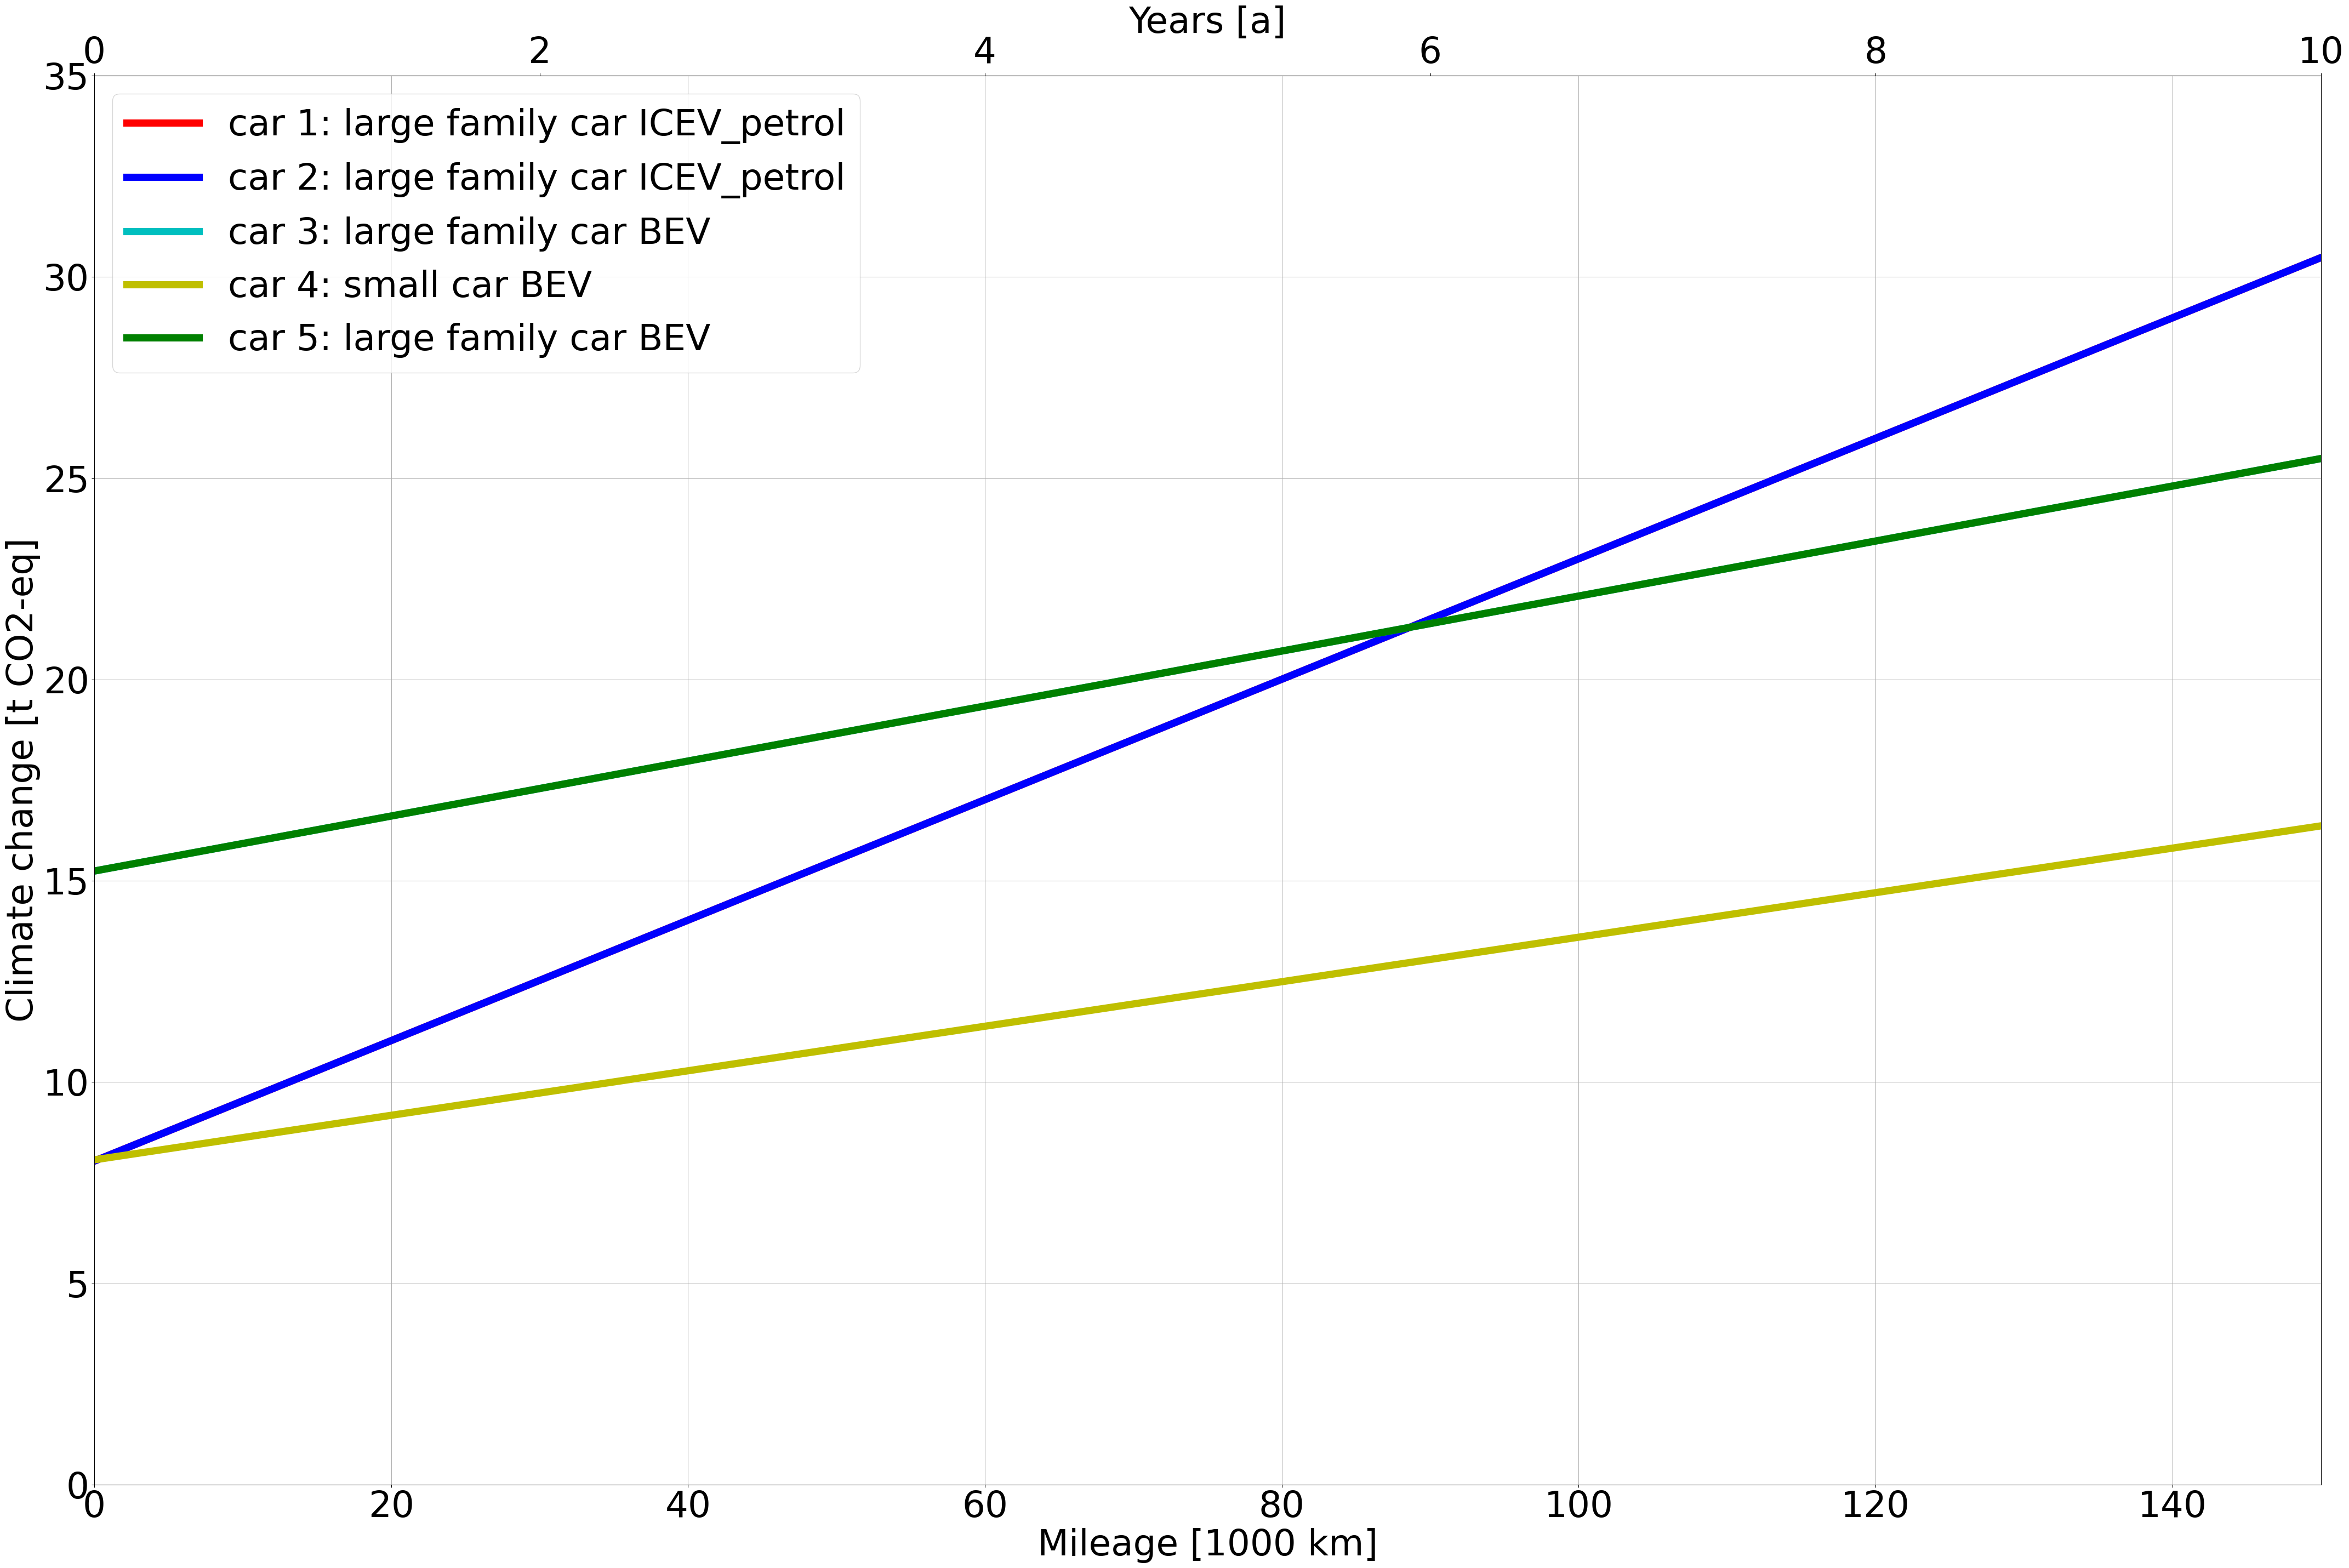

In [ ]:
#Graphs
total_km = lifespan*mileage_year


ct_1 = car1_ct_input.value
dt_1 = car1_dt_input.value
graph_car1 = []

ct_2 = car2_ct_input.value
dt_2 = car2_dt_input.value
graph_car2 = []


ct_3 = car3_ct_input.value
dt_3 = car3_dt_input.value
graph_car3 = []

ct_4 = car4_ct_input.value
dt_4 = car4_dt_input.value
graph_car4 = []


ct_5 = car5_ct_input.value
dt_5 = car5_dt_input.value
graph_car5 = []

plt.rcParams['figure.figsize'] = [45, 30]
plt.rcParams['figure.dpi'] = 95
plt.rcParams['font.size'] = 50

plt.rcParams['figure.subplot.bottom'] = 0.14
linewidth=10

fig, ax = plt.subplots(constrained_layout=True)



x = np.linspace(0,total_km,num=int(total_km/1000))

if ct_1 !='none':
    graph_car1 = h_prod_cc[dt_1][ct_1] + h_use_cc[dt_1][ct_1] *x + h_eol_cc[dt_1][ct_1]
    ax.plot(x/1000, graph_car1/1000, '-r', label='car 1: '+ct_1+ ' '+ dt_1, linewidth=linewidth)

if ct_2 !='none':   
    graph_car2 = h_prod_cc[dt_2][ct_2] + h_use_cc[dt_2][ct_2] *x + h_eol_cc[dt_2][ct_2]
    ax.plot(x/1000, graph_car2/1000, '-b', label='car 2: '+ct_2+ ' '+ dt_2, linewidth=linewidth)
    
if ct_3 !='none': 
    
    graph_car3 = h_prod_cc[dt_3][ct_3] + h_use_cc[dt_3][ct_3] *x + h_eol_cc[dt_3][ct_3]
    ax.plot(x/1000, graph_car3/1000, '-c', label='car 3: '+ct_3+ ' '+ dt_3, linewidth=linewidth)
    
if ct_4 !='none': 
    graph_car4 = h_prod_cc[dt_4][ct_4] + h_use_cc[dt_4][ct_4] *x + h_eol_cc[dt_4][ct_4]
    ax.plot(x/1000, graph_car4/1000, '-y', label='car 4: '+ct_4+ ' '+ dt_4, linewidth=linewidth)
        
if ct_5 !='none': 
    graph_car5 = h_prod_cc[dt_5][ct_5] + h_use_cc[dt_5][ct_5] *x + h_eol_cc[dt_5][ct_5]
    ax.plot(x/1000, graph_car5/1000, '-g', label='car 5: '+ct_5+ ' '+ dt_5, linewidth=linewidth)




def one_over(x):
    return x*1000 / mileage_year
inverse = one_over
 
ax.plot
#ax.set_title('Comparison climate change impact over life time')
ax.set_xlabel('Mileage [1000 km]')
ax.set_ylabel('Climate change [t CO2-eq]')
plt.legend(loc='upper left')
ax.set_ylim(ymin=0, ymax = 35)
ax.set_xlim(xmin=0, xmax= total_km/1000 )

secax = ax.secondary_xaxis('top', functions=(one_over, inverse) )
secax.set_xlabel('Years [a]')

plt.grid()

plt.show()

In [ ]:
#a = y-axis intercept
#b = slope 

car_ar= (graph_car1,graph_car2, graph_car3, graph_car4, graph_car5)
car_ar_name = ['Car 1','Car 2', 'Car 3','Car 4','Car 5']

x1=[0,1,2,3,4]

for i in x1:
    if len(car_ar[i])>0:
        a_i = car_ar[i][0]
        b_i = car_ar[i][1]-car_ar[i][0]

        for j in x1:
            if len(car_ar[j])>0 and j>i:
               
                a_j = car_ar[j][0] 
                b_j = car_ar[j][1]-car_ar[j][0]
                if b_j - b_i !=0:

                    xij =(a_i-a_j)/(b_j-b_i) #intersection

                    xij_int = xij.astype(int) #integer

                    yij = a_j+xij*b_j
                    yij_int = round(yij)

                    if xij_int < 0:
                        print(car_ar_name[i]+ ' and ' +car_ar_name[j] + ' have no intercept')
                    else:
                        print(car_ar_name[i] + ' and '+  car_ar_name[j] + ' intercept at', xij_int*1000, 'kilometer and climate change impact of',yij_int ,'kg CO2-eq.')              
                    print(' ')

        print(' ')

Car 1 and Car 3 intercept at 88000 kilometer and climate change impact of 21295 kg CO2-eq.
 
Car 1 and Car 4 intercept at 0 kilometer and climate change impact of 8087 kg CO2-eq.
 
Car 1 and Car 5 intercept at 88000 kilometer and climate change impact of 21295 kg CO2-eq.
 
 
Car 2 and Car 3 intercept at 88000 kilometer and climate change impact of 21295 kg CO2-eq.
 
Car 2 and Car 4 intercept at 0 kilometer and climate change impact of 8087 kg CO2-eq.
 
Car 2 and Car 5 intercept at 88000 kilometer and climate change impact of 21295 kg CO2-eq.
 
 
Car 3 and Car 4 have no intercept
 
 
Car 4 and Car 5 have no intercept
 
 
 
